# Ilustration of VTK graphical output
* we will use vtkxmlPy export module to facilitate rendering in python using pyvista
* we will ilustrate various pyvista jupyter backends to perform rendering (static, pythreejs and itkwidgets)

First initialize and solve sample problem 

In [1]:
import oofempy
import numpy as np

In [2]:
dr=oofempy.OOFEMTXTDataReader("/home/jovyan/oofem-examples/c.in")
problem=oofempy.InstanciateProblem(dr, oofempy.problemMode.processor, False, None, False)
problem.init()
problem.solveYourself()
# create and inject vtkxmlPy export module to facilitate rendering in python using pyvista
vtkxmlPy = oofempy.vtkmemory(1, problem, domain_all=True, tstep_all=True, dofman_all=True, element_all=True, vars=(1,4), primvars=(1,), cellvars = (47,), stype=1, pythonExport=1)
vtkxmlPy.initialize()
vtkxmlPy.doOutput(problem.giveCurrentStep(), False)

OctreeLocalizer: init
Spatial localizer init done
Computing initial guess

StaticStructural :: solveYourselfAt - Solving step 1, metastep 1, (neq = 885)
CALMLS:       Initial step length: 2.500000e-02   
CALMLS:       Iteration       LoadLevel       ForceError      DisplError    
----------------------------------------------------------------------------
CALMLS:       1               6.105389e+00    1.532959e-13    1.034151e-14   
CALMLS:       Adjusted step length: 2.500000e-02   
Checking rules...
EngngModel info: user time consumed by solution step 1: 0.01s
Computing initial guess

StaticStructural :: solveYourselfAt - Solving step 2, metastep 1, (neq = 885)
CALMLS:       Initial step length: 2.500000e-02   
CALMLS:       Iteration       LoadLevel       ForceError      DisplError    
----------------------------------------------------------------------------
CALMLS:       1               1.221078e+01    2.253033e-13    5.261375e-15   
CALMLS:       Adjusted step length: 2.500000e-

## Set up plotter

We will use services of vtkxmlPy to create pyvista represenation of grid (mesh) and fields by looping over exprorted regions (called pieces)

In [3]:
import pyvista as pv
#pv.set_jupyter_backend('static')
pv.start_xvfb()

for p in vtkxmlPy.getVTKPieces():
#p = vtkxmlPy.getVTKPieces()[0]
    #print ("Piece:", p)
    #print(p.getVertices())
    #print(p.getCellConnectivity())
    #print(p.getCellTypes(vtkxmlPy))
    disp = p.getPrimaryVertexValues(oofempy.UnknownType.DisplacementVector)
    sig = p.getInternalVertexValues(oofempy.InternalStateType.IST_StressTensor)
    sigx = sig[:, 0]
    
    grid = pv.UnstructuredGrid(p.getCellConnectivity(), p.getCellTypes(vtkxmlPy), p.getVertices())
    grid.point_data['Sigma_xx'] = sigx
    grid['Disp'] = disp
    print(grid.active_vectors)
    warped = grid.warp_by_vector('Disp', factor=1000.)
    p = pv.Plotter()
    p.add_mesh(warped, scalars='Sigma_xx')
    p.add_mesh(grid, style='wireframe', color='black')
    p.set_viewup((0,1,0))
problem.terminateAnalysis()


None


### Static plotter 
 Display a single static image within the Jupyterlab environment. Requires that a virtual framebuffer be setup when displaying on a headless server, but does not require any additional modules to be installed.

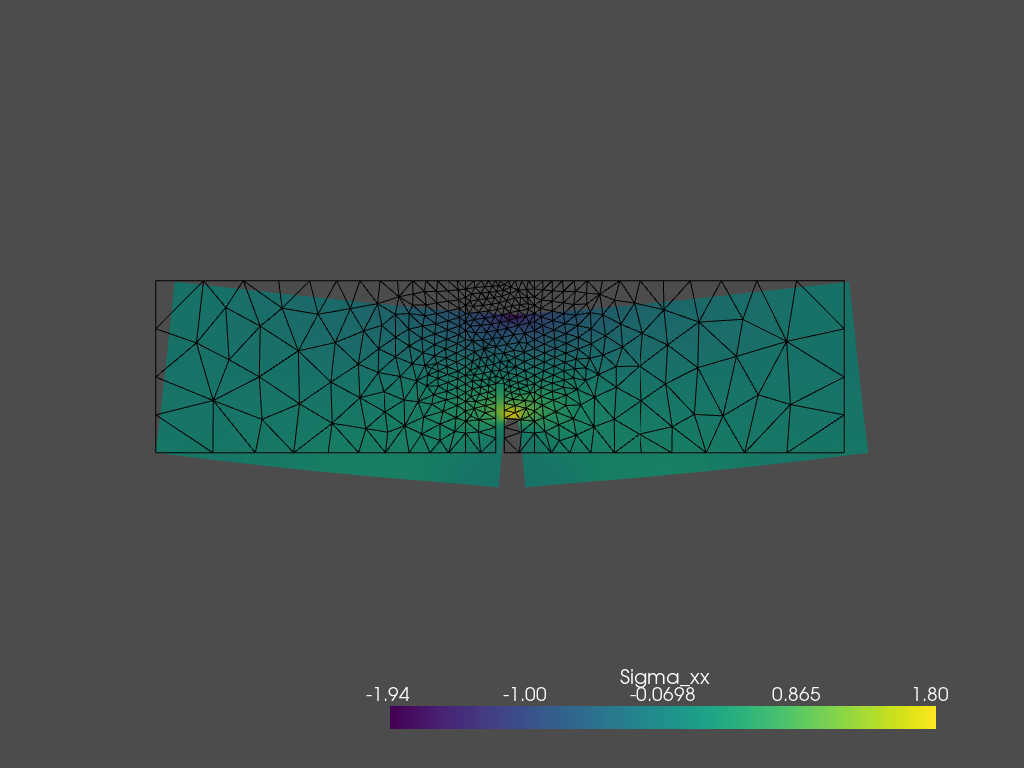

In [4]:
p.show(jupyter_backend='static')
#p.show(jupyter_backend='pythreejs')

In [5]:
p = vtkxmlPy.getVTKPieces()[0]
grid = pv.UnstructuredGrid(p.getCellConnectivity(), p.getCellTypes(vtkxmlPy), p.getVertices())
grid.point_data['Sigma_xx'] = sigx
grid['Disp'] = disp
warped = grid.warp_by_vector('Disp', factor=1000.)
pl = pv.Plotter()
pl.add_mesh(warped, scalars='Sigma_xx')
pl.add_mesh(grid, style='wireframe', color='black')
pl.set_viewup((0,1,0))
pl.show(jupyter_backend='pythreejs')

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(color='#fefefe', inten…

## Interactive rendering using itkwidgets

In [6]:
from itkwidgets import view
p = vtkxmlPy.getVTKPieces()[0]
grid = pv.UnstructuredGrid(p.getCellConnectivity(), p.getCellTypes(vtkxmlPy), p.getVertices())
grid.point_data['Sigma_xx'] = sigx
grid['Disp'] = disp
warped = grid.warp_by_vector('Disp', factor=1000.)
pl=pv.PlotterITK()
#pl.add_mesh(grid)
pl.add_mesh(warped)
pl.show(ui_collapsed=False)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…